In [1]:
import pandas as pd
import networkx as nx
import matplotlib . pyplot as plt

In [265]:
#random_n60_k2_pos30_neg5_err5_3.g
#random_n60_k5_pos30_neg5_err5_1.g
#random_n60_k5_pos30_neg5_err5_5.g
#random_n60_k5_pos30_neg5_err10_1.g
#random_n60_k5_pos30_neg5_err10_2.g
#random_n60_k5_pos30_neg5_err10_3.g
#random_n60_k5_pos30_neg5_err20_1.g

instance = f"../data/kmbs/instances/RANDOM/random_n60_k2_pos30_neg5_err5_3.g"

with open(instance, 'r') as file: 
    lines = file.readlines()

lines = [a.strip() for a in lines]

values = lines[0].split()
n, m = int(values[0]), int(values[1])

print("n =", n)
print("m =", m)

n = 60
m = 332


In [266]:
G = nx.Graph()

In [267]:
for k in range(n):
    G.add_node(k)

In [268]:
for e in range(1,m+1):   
    values = lines[e].split()
    i, j, val = int(values[0]), int(values[1]), int(values[2])
    G.add_edge(i, j, weight=val)

In [269]:
print(G.number_of_nodes())
print(G.number_of_edges())

60
332


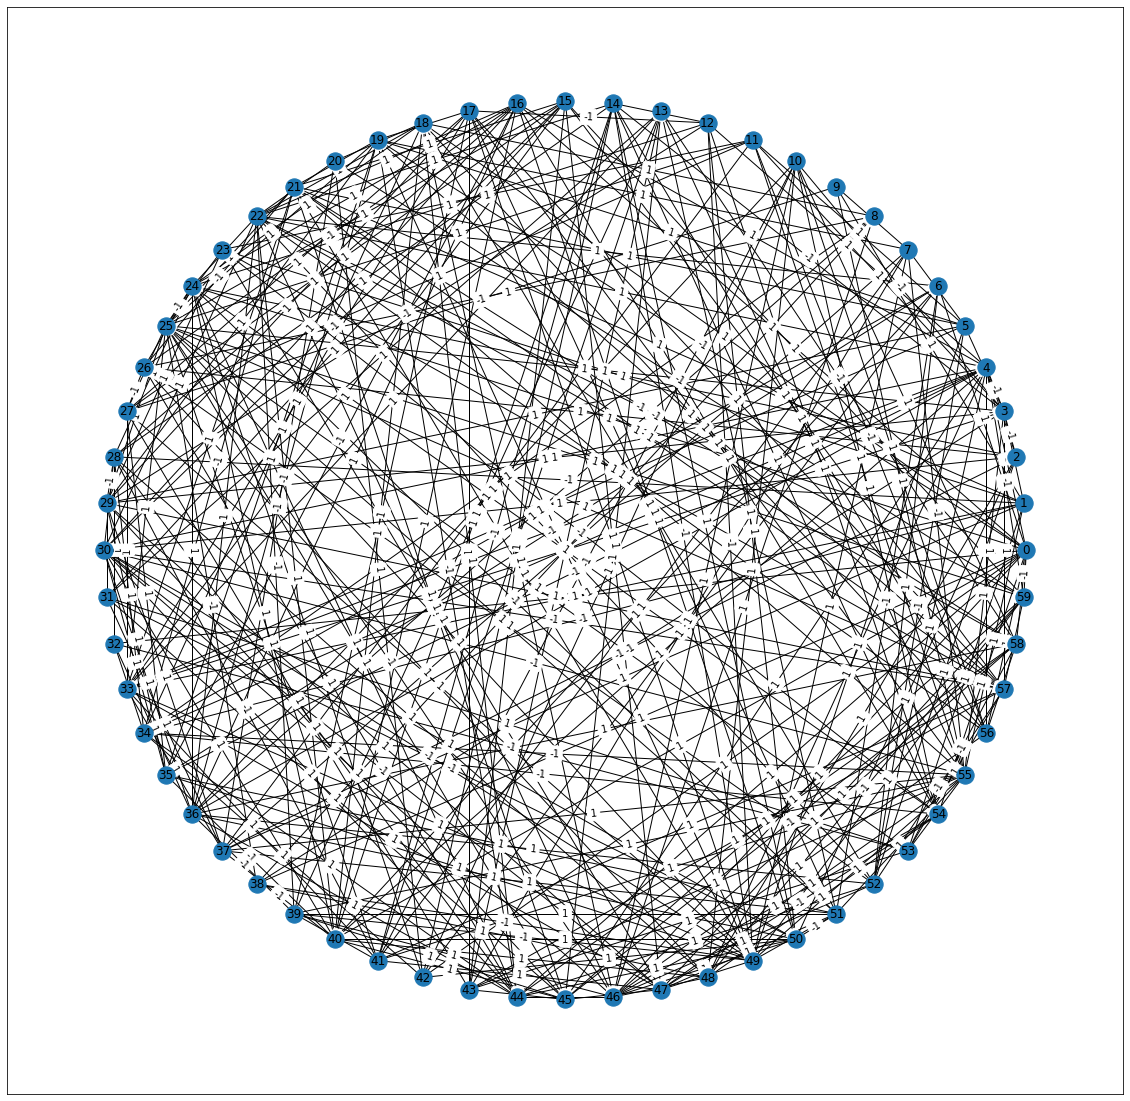

In [270]:
plt.figure(figsize=(20, 20))
#pos=nx.spring_layout(G)
#pos=nx.random_layout(G)
pos=nx.circular_layout(G)
#pos=nx.planar_layout(G)
nx.draw_networkx(G,pos,with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [271]:
EP = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
EN = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0]

In [272]:
print(len(EP),len(EN))

267 65


In [273]:
H = G.edge_subgraph(EP)
#list(H.edges)
#list(H.nodes)

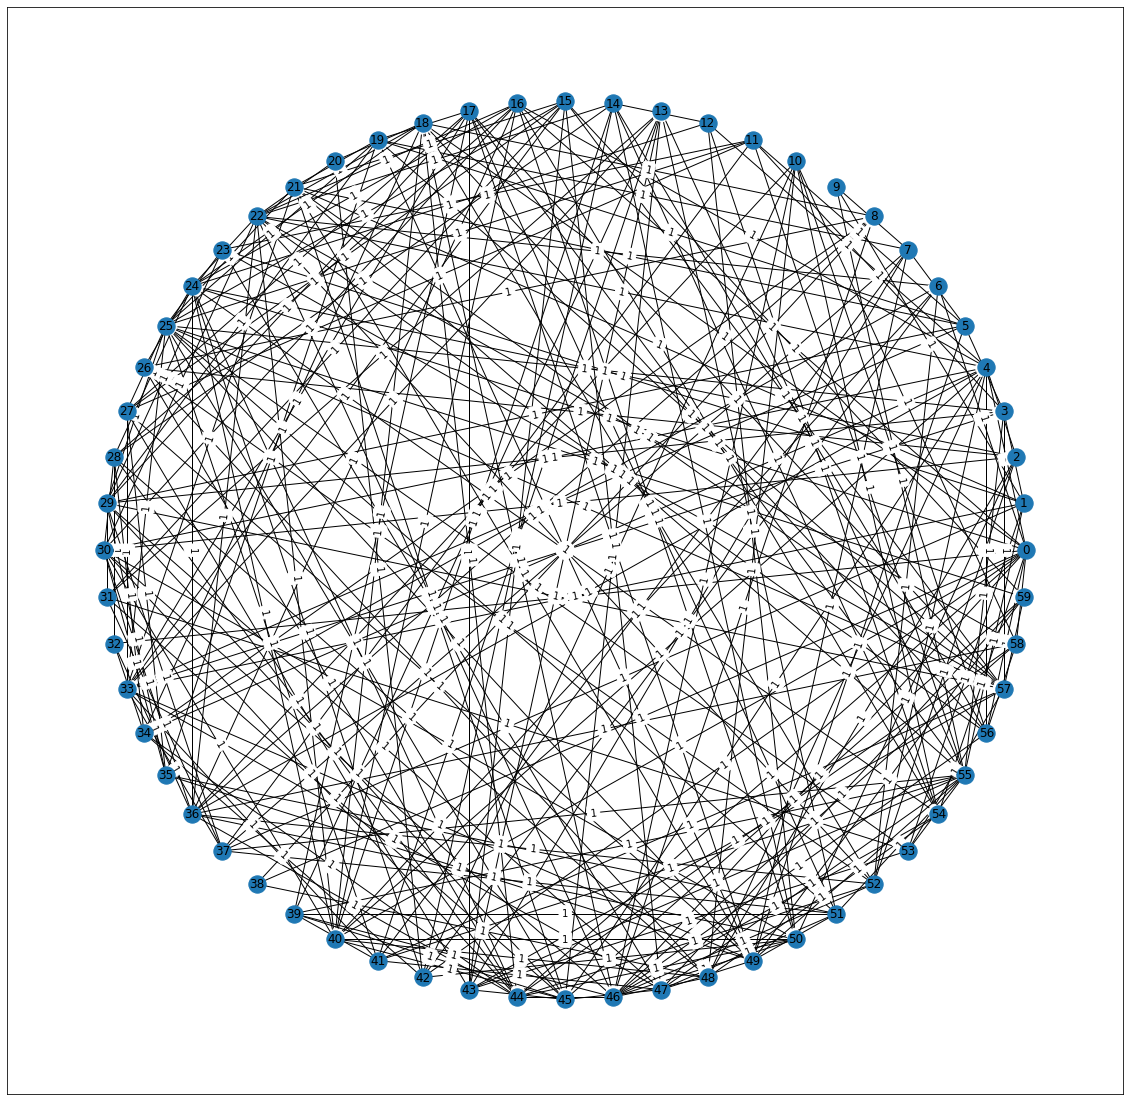

In [274]:
plt.figure(figsize=(20, 20))
pos=nx.circular_layout(H)
nx.draw_networkx(H,pos,with_labels=True)
labels = nx.get_edge_attributes(H,'weight')
nx.draw_networkx_edge_labels(H,pos,edge_labels=labels)
plt.show()

In [275]:
NeighbM = []
NeighbP = []

In [276]:
nodes = G.nodes()

A = []
for i in nodes:
    #print(i, ": ", end="")
    neighbors = G.neighbors(i)
    lst = []
    for j in neighbors:
        if G[i][j]["weight"] < 0:
            lst.append(j)
    lst.append(i)
    lstCoV =  list(set(nodes) - set(lst))
    for j in lstCoV:
        if (i<j):
            a = (i,j)
            A.append(a)

print(A)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59),

In [277]:
A0 = A
for i in nodes:
    a = (i,i)
    A0.append(a)

print(A0)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59),

In [278]:
D = []
for i in nodes:
    lst = []
    for j in nodes:
        if (i,j) in A0:
            lst.append(j)
    D.append(lst)

print(D)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [3, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 

In [279]:
O = []
for j in nodes:
    lst = []
    for i in nodes:
        if (i,j) in A0:
            lst.append(i)
    O.append(lst)

print(O)

[[0], [0, 1], [0, 1, 2], [0, 1, 3], [0, 1, 2, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 4, 5, 6, 7, 8, 9, 10], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15

In [280]:
import gurobipy as gp
from gurobipy import GRB

In [281]:
model = gp.Model()

x = model.addVars(A0,vtype=GRB.BINARY, name="x")

In [282]:
#objective function

obj = 0
for e in A0:
    obj += 1*x[e]
         
model.setObjective(obj, GRB.MAXIMIZE)

In [283]:
# constraints
 
for j in nodes:
    constr = 0
    for i in O[j]:
        constr += x[(i,j)] 
    model.addConstr(constr <= 1.0, "constr2")

    constr = 0
for i in nodes:
    constr += x[(i,i)] 
model.addConstr(constr <= 2.0, "constr3")

for e in A:
    model.addConstr(x[(e[0],e[1])] <= x[(e[0],e[0])], "constr4")

for e in EN:
    for p in O[e[0]]:
        if p in O[e[1]]:
            model.addConstr(x[(p,e[0])] + x[(p,e[1])] <= x[(p,p)], "constr5")

for e in EP:
    for p in O[e[0]]:
        M = O[e[1]]
        M = list(set(M) - {p})
        for q in M:
            model.addConstr(x[(p,e[0])] + x[(q,e[1])] <= 1.0, "constr6")

In [284]:
model.optimize()
        
tmp = 0
if model.status == GRB.OPTIMAL:
    tmp = 1
 
objbound = model.objBound
objval = model.objVal
mipgap = model.MIPGap
runtime = model.Runtime
nodecount = model.NodeCount
status = tmp


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 238867 rows, 1765 columns and 480554 nonzeros
Model fingerprint: 0x096ce6a1
Variable types: 0 continuous, 1765 integer (1765 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 2.0000000
Found heuristic solution: objective 35.0000000
Presolve removed 230454 rows and 0 columns
Presolve time: 2.80s
Presolved: 8413 rows, 1765 columns, 168585 nonzeros
Variable types: 0 continuous, 1765 integer (1765 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
    6859    5.5950746e+01   1.284138e+03   0.000000e+00      5s
   14567    5.3742961e+01   0.000000e+0

In [285]:
print("lb = ", objbound)
print("ub = ", objval)
print("time = ", runtime)
print("gap = ", mipgap)
print("nodes = ", nodecount)
print("status = ", status)

lb =  53.0
ub =  53.0
time =  13.306976795196533
gap =  0.0
nodes =  1.0
status =  1
